In [1]:
import pickle
import collections
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported.')

Libraries imported.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
places_df = pd.read_pickle("data/filtered_places.pkl")
places_df.head()

,price,gPlusPlaceId,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,100327153115986850675,43.529494,-96.792244,0,0,0,0,2,2,0
1,1,118222137795476771294,45.535176,-122.862242,2,2,2,2,2,2,2
2,1,106432060150136868000,39.692899,-84.136173,0,0,0,0,0,0,0
3,2,110300304875024740707,42.406904,-71.143994,0,0,0,0,0,0,0
4,2,101886054451353290361,57.295779,-180.000000,0,0,0,0,0,0,0


In [4]:
places_df.shape

(264832, 11)

In [5]:
reviews_df = pd.read_pickle("data/filtered_reviews.pkl")
reviews_df.head()

,rating,categories,gPlusPlaceId,gPlusUserId,reviewYear,sentimentScore
0,5.0,"[European Restaurant, Italian Restaurant, Pizz...",109420033090810328045,100000032416892623125,2014,0.326806
1,5.0,[Mexican Restaurant],115827996910815192564,100000032416892623125,2014,0.300000
2,2.0,[Restaurant],100073820849130920147,100000053212755369563,2013,0.018750
3,2.0,"[Pizza Restaurant, European Restaurant]",102333498482915416504,100000053212755369563,2013,-0.082653
4,1.0,"[Pizza Restaurant, European Restaurant]",102471437282277965376,100000053212755369563,2013,-0.305176


In [6]:
reviews_df.shape

(643195, 6)

In [7]:
reviews_place_df = pd.merge(reviews_df, places_df, on='gPlusPlaceId', how='right')
reviews_place_df.shape

(759849, 16)

In [8]:
reviews_place_df.head()

,rating,categories,gPlusPlaceId,gPlusUserId,reviewYear,sentimentScore,price,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,5.0,[Restaurant],100327153115986850675,101183122650640149657,2013,0.465000,1,43.529494,-96.792244,0,0,0,0,2,2,0
1,5.0,[Restaurant],100327153115986850675,105277843660015927380,2013,0.562500,1,43.529494,-96.792244,0,0,0,0,2,2,0
2,4.0,[Restaurant],100327153115986850675,108399917276978277903,2013,0.700000,1,43.529494,-96.792244,0,0,0,0,2,2,0
3,5.0,[Restaurant],100327153115986850675,108655343770075466215,2013,0.750000,1,43.529494,-96.792244,0,0,0,0,2,2,0
4,5.0,[Restaurant],100327153115986850675,110211969538648619861,2013,0.560417,1,43.529494,-96.792244,0,0,0,0,2,2,0


In [10]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
temp_df = reviews_place_df[['rating', 'sentimentScore', 'price'] + weekdays]
temp_df.head()

,rating,sentimentScore,price,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,5.0,0.465000,1,0,0,0,0,2,2,0
1,5.0,0.562500,1,0,0,0,0,2,2,0
2,4.0,0.700000,1,0,0,0,0,2,2,0
3,5.0,0.750000,1,0,0,0,0,2,2,0
4,5.0,0.560417,1,0,0,0,0,2,2,0


In [31]:
mon_df = temp_df[['rating', 'sentimentScore', 'price', 'Monday']].groupby('Monday', as_index=False).mean()

In [32]:
tue_df = temp_df[['rating', 'sentimentScore', 'price', 'Tuesday']].groupby('Tuesday', as_index=False).mean()

In [33]:
wed_df = temp_df[['rating', 'sentimentScore', 'price', 'Wednesday']].groupby('Wednesday', as_index=False).mean()

In [44]:
thu_df = temp_df[['rating', 'sentimentScore', 'price', 'Thursday']].groupby('Thursday', as_index=False).mean()

In [35]:
fri_df = temp_df[['rating', 'sentimentScore', 'price', 'Friday']].groupby('Friday', as_index=False).mean()

In [36]:
sat_df = temp_df[['rating', 'sentimentScore', 'price', 'Saturday']].groupby('Saturday', as_index=False).mean()

In [37]:
sun_df = temp_df[['rating', 'sentimentScore', 'price', 'Sunday']].groupby('Sunday', as_index=False).mean()

In [88]:
mon_df

,Monday,rating,sentimentScore,price
0,0,3.881336,0.314508,1.319748
1,1,4.153689,0.363106,1.119792
2,2,3.490630,0.220780,1.555841


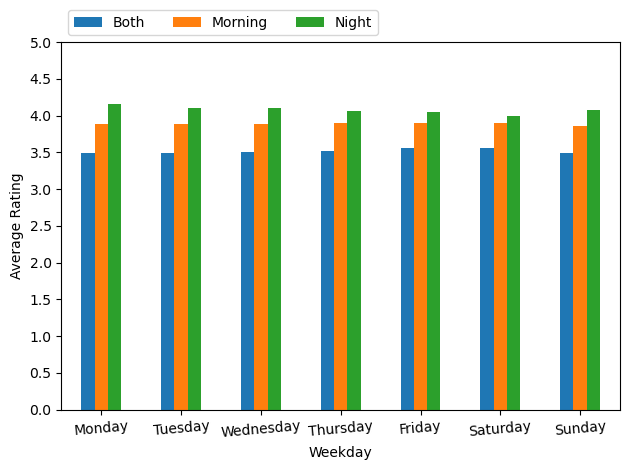

In [71]:
df = pd.DataFrame(
    [['Morning','Monday',mon_df['rating'].iloc[0]],
     ['Night','Monday',mon_df['rating'].iloc[1]],
     ['Both','Monday',mon_df['rating'].iloc[2]],
     ['Morning','Tuesday',tue_df['rating'].iloc[0]],
     ['Night','Tuesday',tue_df['rating'].iloc[1]],
     ['Both','Tuesday',tue_df['rating'].iloc[2]],
     ['Morning','Wednesday',wed_df['rating'].iloc[0]],
     ['Night','Wednesday',wed_df['rating'].iloc[1]],
     ['Both','Wednesday',wed_df['rating'].iloc[2]],
     ['Morning','Thursday',thu_df['rating'].iloc[0]],
     ['Night','Thursday',thu_df['rating'].iloc[1]],
     ['Both','Thursday',thu_df['rating'].iloc[2]],
     ['Morning','Friday',fri_df['rating'].iloc[0]],
     ['Night','Friday',fri_df['rating'].iloc[1]],
     ['Both','Friday',fri_df['rating'].iloc[2]],
     ['Morning','Saturday',sat_df['rating'].iloc[0]],
     ['Night','Saturday',sat_df['rating'].iloc[1]],
     ['Both','Saturday',sat_df['rating'].iloc[2]],
     ['Morning','Sunday',sun_df['rating'].iloc[0]],
     ['Night','Sunday',sun_df['rating'].iloc[1]],
     ['Both','Sunday',sun_df['rating'].iloc[2]]],
    columns=['Restaurant Type','Weekday','Average Rating'])

df.pivot("Weekday", "Restaurant Type", "Average Rating").loc[weekdays].plot(kind='bar')

plt.xticks(rotation=5)
plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=3)
plt.ylabel("Average Rating")

plt.tight_layout()
plt.show()

In [90]:
average_rating = {
    0: 0,
    1: 0,
    2: 0
}

for dt in mon_df.values:
    average_rating[int(dt[0])] += dt[1]
for dt in tue_df.values:
    average_rating[int(dt[0])] += dt[1]
for dt in wed_df.values:
    average_rating[int(dt[0])] += dt[1]
for dt in thu_df.values:
    average_rating[int(dt[0])] += dt[1]
for dt in fri_df.values:
    average_rating[int(dt[0])] += dt[1]
for dt in sat_df.values:
    average_rating[int(dt[0])] += dt[1]
for dt in sun_df.values:
    average_rating[int(dt[0])] += dt[1]
    
for key in average_rating.keys():
    average_rating[key] = average_rating[key] / 7
    
average_rating['Morning'] = round(average_rating.pop(0), 4)
average_rating['Night'] = round(average_rating.pop(1), 4)
average_rating['Both'] = round(average_rating.pop(2), 4)
    
print(average_rating)
print(round(sum(average_rating.values())/3, 4))

{'Morning': 3.8901, 'Night': 4.0774, 'Both': 3.5166}
3.828


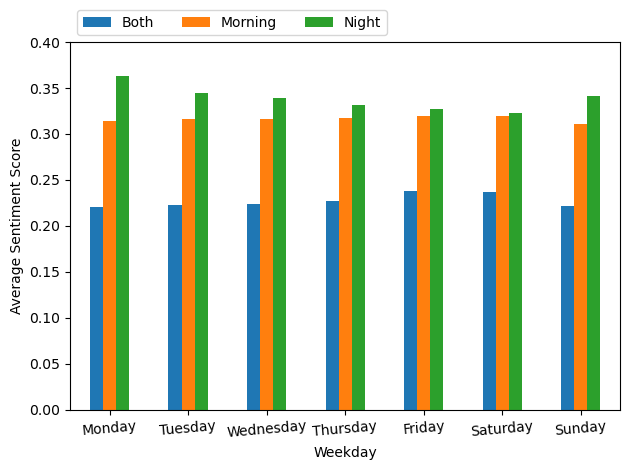

In [84]:
df = pd.DataFrame(
    [['Morning','Monday',mon_df['sentimentScore'].iloc[0]],
     ['Night','Monday',mon_df['sentimentScore'].iloc[1]],
     ['Both','Monday',mon_df['sentimentScore'].iloc[2]],
     ['Morning','Tuesday',tue_df['sentimentScore'].iloc[0]],
     ['Night','Tuesday',tue_df['sentimentScore'].iloc[1]],
     ['Both','Tuesday',tue_df['sentimentScore'].iloc[2]],
     ['Morning','Wednesday',wed_df['sentimentScore'].iloc[0]],
     ['Night','Wednesday',wed_df['sentimentScore'].iloc[1]],
     ['Both','Wednesday',wed_df['sentimentScore'].iloc[2]],
     ['Morning','Thursday',thu_df['sentimentScore'].iloc[0]],
     ['Night','Thursday',thu_df['sentimentScore'].iloc[1]],
     ['Both','Thursday',thu_df['sentimentScore'].iloc[2]],
     ['Morning','Friday',fri_df['sentimentScore'].iloc[0]],
     ['Night','Friday',fri_df['sentimentScore'].iloc[1]],
     ['Both','Friday',fri_df['sentimentScore'].iloc[2]],
     ['Morning','Saturday',sat_df['sentimentScore'].iloc[0]],
     ['Night','Saturday',sat_df['sentimentScore'].iloc[1]],
     ['Both','Saturday',sat_df['sentimentScore'].iloc[2]],
     ['Morning','Sunday',sun_df['sentimentScore'].iloc[0]],
     ['Night','Sunday',sun_df['sentimentScore'].iloc[1]],
     ['Both','Sunday',sun_df['sentimentScore'].iloc[2]]],
    columns=['Restaurant Type','Weekday','Average Sentiment Score'])

df.pivot("Weekday", "Restaurant Type", "Average Sentiment Score").loc[weekdays].plot(kind='bar')

plt.xticks(rotation=5)
plt.yticks(np.arange(0.0, 0.45, 0.05))
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=3)
plt.ylabel("Average Sentiment Score")

plt.tight_layout()
plt.show()

In [92]:
average_sentiment = {
    0: 0,
    1: 0,
    2: 0
}

for dt in mon_df.values:
    average_sentiment[int(dt[0])] += dt[2]
for dt in tue_df.values:
    average_sentiment[int(dt[0])] += dt[2]
for dt in wed_df.values:
    average_sentiment[int(dt[0])] += dt[2]
for dt in thu_df.values:
    average_sentiment[int(dt[0])] += dt[2]
for dt in fri_df.values:
    average_sentiment[int(dt[0])] += dt[2]
for dt in sat_df.values:
    average_sentiment[int(dt[0])] += dt[2]
for dt in sun_df.values:
    average_sentiment[int(dt[0])] += dt[2]
    
for key in average_sentiment.keys():
    average_sentiment[key] = average_sentiment[key] / 7
    
average_sentiment['Morning'] = round(average_sentiment.pop(0), 4)
average_sentiment['Night'] = round(average_sentiment.pop(1), 4)
average_sentiment['Both'] = round(average_sentiment.pop(2), 4)
    
print(average_sentiment)
print(round(sum(average_sentiment.values())/3, 4))

{'Morning': 0.3164, 'Night': 0.3385, 'Both': 0.2273}
0.2941


In [51]:
reviews_place_df.dropna(subset=['categories'], inplace=True)
reviews_place_df.shape

(643195, 16)

In [52]:
def one_hot_encode(dataset, column_name):
#   dataset = column_cleanup(dataset, column_name)

  mlb = MultiLabelBinarizer(sparse_output=True)
    dataset = dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(dataset[column_name]),
                index=dataset.index,
                columns=mlb.classes_))
  print("number of unique classes = ", len(mlb.classes_))
  print("classes = ", mlb.classes_)
  return mlb.classes_, dataset

In [53]:
classes, one_hot_encoded_dataset = one_hot_encode(reviews_place_df, "categories")

number of unique classes =  40
classes =  ['American Restaurant' 'Asian Restaurant' 'Barbecue Restaurant'
 'Breakfast Restaurant' 'Brunch Restaurant' 'Buffet Restaurant'
 'Caribbean Restaurant' 'Chicken Restaurant' 'Chicken Wings Restaurant'
 'Chinese Restaurant' 'Delivery Restaurant' 'Dessert Restaurant'
 'Eclectic Restaurant' 'European Restaurant' 'Family Restaurant'
 'Fast Food Restaurant' 'Fine Dining Restaurant' 'French Restaurant'
 'Greek Restaurant' 'Hamburger Restaurant' 'Indian Restaurant'
 'Italian Restaurant' 'Japanese Restaurant' 'Latin American Restaurant'
 'Mediterranean Restaurant' 'Mexican Restaurant'
 'Middle Eastern Restaurant' 'Pizza Restaurant' 'Restaurant'
 'Restaurant or Cafe' 'Seafood Restaurant' 'South Asian Restaurant'
 'Southeast Asian Restaurant' 'Southern Restaurant (US)'
 'Sushi Restaurant' 'Takeout Restaurant' 'Tex-Mex Restaurant'
 'Thai Restaurant' 'Vegetarian Restaurant' 'Vietnamese Restaurant']


In [55]:
one_hot_encoded_dataset.shape

(643195, 56)

In [56]:
one_hot_encoded_dataset.drop(columns=['categories'], inplace=True)

In [57]:
one_hot_encoded_dataset.shape

(643195, 55)

In [58]:
one_hot_encoded_dataset.head()

,rating,gPlusPlaceId,gPlusUserId,reviewYear,sentimentScore,price,latitude,longitude,Monday,Tuesday,...,Seafood Restaurant,South Asian Restaurant,Southeast Asian Restaurant,Southern Restaurant (US),Sushi Restaurant,Takeout Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian Restaurant,Vietnamese Restaurant
0,5.0,100327153115986850675,101183122650640149657,2013,0.465000,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,100327153115986850675,105277843660015927380,2013,0.562500,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,100327153115986850675,108399917276978277903,2013,0.700000,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,100327153115986850675,108655343770075466215,2013,0.750000,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,100327153115986850675,110211969538648619861,2013,0.560417,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
one_hot_encoded_dataset.to_pickle("data/processed_data.pkl")

In [4]:
one_hot_encoded_dataset = pd.read_pickle("data/processed_data.pkl")

In [5]:
one_hot_encoded_dataset.head()

,rating,gPlusPlaceId,gPlusUserId,reviewYear,sentimentScore,price,latitude,longitude,Monday,Tuesday,...,Seafood Restaurant,South Asian Restaurant,Southeast Asian Restaurant,Southern Restaurant (US),Sushi Restaurant,Takeout Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian Restaurant,Vietnamese Restaurant
0,5.0,100327153115986850675,101183122650640149657,2013,0.465000,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,100327153115986850675,105277843660015927380,2013,0.562500,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,100327153115986850675,108399917276978277903,2013,0.700000,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,100327153115986850675,108655343770075466215,2013,0.750000,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,100327153115986850675,110211969538648619861,2013,0.560417,1,43.529494,-96.792244,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
one_hot_encoded_dataset.drop(columns=['gPlusPlaceId', 'gPlusUserId', 'reviewYear'], inplace=True)
one_hot_encoded_dataset.head()

,rating,sentimentScore,price,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,Friday,...,Seafood Restaurant,South Asian Restaurant,Southeast Asian Restaurant,Southern Restaurant (US),Sushi Restaurant,Takeout Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian Restaurant,Vietnamese Restaurant
0,5.0,0.465000,1,43.529494,-96.792244,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.562500,1,43.529494,-96.792244,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.700000,1,43.529494,-96.792244,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,5.0,0.750000,1,43.529494,-96.792244,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,5.0,0.560417,1,43.529494,-96.792244,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [69]:
train_set, test_set = train_test_split(one_hot_encoded_dataset, test_size=0.20, random_state=42)

In [70]:
train_set.shape

(514556, 52)

In [71]:
test_set.shape

(128639, 52)

### Create clusters

Use Silhouette score to find the best num of clusters

2 0.9992004909589455
3 0.9992598309067003
4 0.9986271642869832
5 0.9988462972037139
6 0.9984445800347062
7 0.9987702069041444
8 0.9985678804345761
9 0.9987613495404669
10 0.9987934237023665


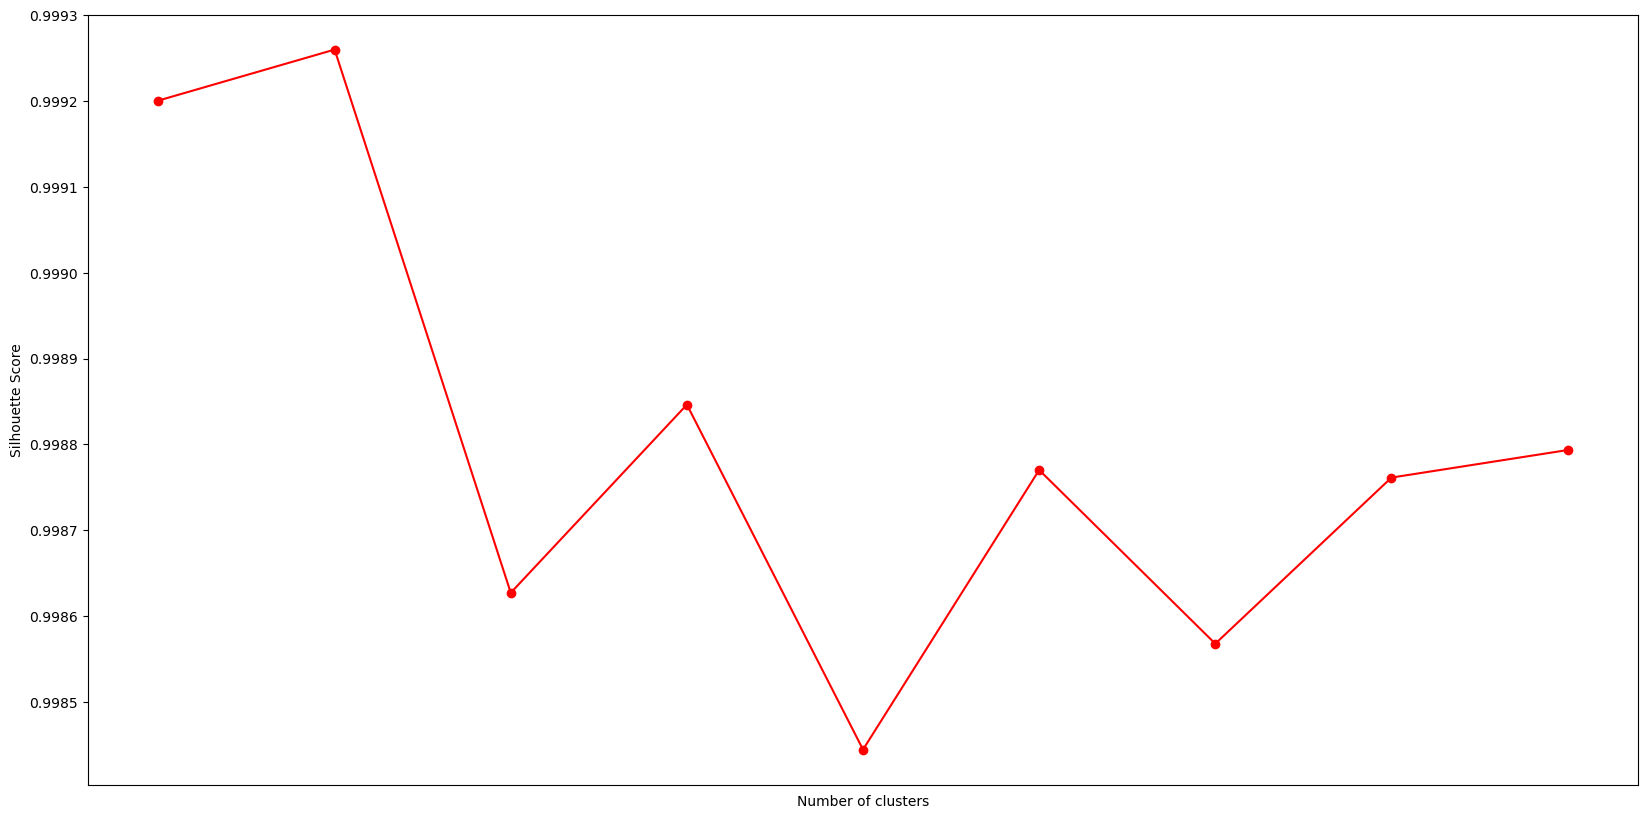

In [73]:
scores = []

max_cluster = 2
max_score = -float('inf')

for kclusters in range(2, 11):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++').fit_predict(train_set)

    # Gets the silhouette score
    score = silhouette_score(train_set, kmeans, sample_size=50000)
    scores.append(score)

    if score > max_score:
        max_score = score
        max_cluster = kclusters
        
    print(kclusters, score)

plt.figure(figsize=(20,10))
plt.plot(np.arange(2, 11), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.show()

In [74]:
# select best number of clusters
kclusters = max_cluster

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init = 'k-means++').fit(train_set)

# check cluster labels generated for first 10 rows in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [76]:
# add clustering labels
train_set.insert(0, 'clusterLabels', kmeans.labels_)

train_set.head()

,clusterLabels,rating,sentimentScore,price,latitude,longitude,Monday,Tuesday,Wednesday,Thursday,...,Seafood Restaurant,South Asian Restaurant,Southeast Asian Restaurant,Southern Restaurant (US),Sushi Restaurant,Takeout Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian Restaurant,Vietnamese Restaurant
745332,0,5.0,0.600000,1,46.543680,-87.396459,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534005,0,5.0,0.104167,1,33.768925,-84.385094,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
733683,0,4.0,0.412500,1,39.098424,-94.581954,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
159857,0,3.0,0.136136,1,36.556316,-121.920755,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628493,0,4.0,0.270486,2,37.694584,-120.992477,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
train_set.clusterLabels.value_counts()

0    512804
1      1730
2        22
Name: clusterLabels, dtype: int64

In [92]:
cluster_1 = train_set.loc[train_set['clusterLabels'] == 0, train_set.columns[list(range(13, train_set.shape[1]))]]

categories_1 = collections.Counter()
for column in cluster_1.columns:
    if cluster_1[column].sum() > 5000:
        categories_1[column] = cluster_1[column].sum()
    
print(categories_1)
print(len(categories_1))

Counter({'American Restaurant': 122607, 'Restaurant': 89912, 'Fast Food Restaurant': 85577, 'European Restaurant': 73638, 'Mexican Restaurant': 58072, 'Pizza Restaurant': 55182, 'Asian Restaurant': 54951, 'Latin American Restaurant': 53941, 'Italian Restaurant': 53734, 'Hamburger Restaurant': 50006, 'Chinese Restaurant': 30222, 'Seafood Restaurant': 29952, 'Barbecue Restaurant': 19264, 'Chicken Restaurant': 13450, 'Breakfast Restaurant': 13329, 'Takeout Restaurant': 12890, 'Southeast Asian Restaurant': 11438, 'Japanese Restaurant': 10381, 'Delivery Restaurant': 10177, 'Mediterranean Restaurant': 9202, 'Sushi Restaurant': 8139, 'Family Restaurant': 7643, 'Thai Restaurant': 7056})
23


In [93]:
cluster_2 = train_set.loc[train_set['clusterLabels'] == 1, train_set.columns[list(range(13, train_set.shape[1]))]]

categories_2 = collections.Counter()
for column in cluster_2.columns:
    if cluster_2[column].sum() > 20:
        categories_2[column] = cluster_2[column].sum()
    
print(categories_2)
print(len(categories_2))

Counter({'American Restaurant': 496, 'Fast Food Restaurant': 388, 'Restaurant': 362, 'Latin American Restaurant': 276, 'European Restaurant': 212, 'Asian Restaurant': 190, 'Hamburger Restaurant': 173, 'Mexican Restaurant': 148, 'Italian Restaurant': 123, 'Tex-Mex Restaurant': 123, 'Pizza Restaurant': 120, 'Chinese Restaurant': 87, 'Seafood Restaurant': 65, 'Chicken Restaurant': 63, 'Dessert Restaurant': 55, 'Mediterranean Restaurant': 49, 'Delivery Restaurant': 37, 'Breakfast Restaurant': 34, 'Indian Restaurant': 30, 'Takeout Restaurant': 29, 'South Asian Restaurant': 27, 'Vietnamese Restaurant': 27})
22


In [94]:
cluster_3 = train_set.loc[train_set['clusterLabels'] == 2, train_set.columns[list(range(13, train_set.shape[1]))]]

categories_3 = collections.Counter()
for column in cluster_3.columns:
    if cluster_3[column].sum() > 0:
        categories_3[column] = cluster_3[column].sum()
    
print(categories_3)
print(len(categories_3))

Counter({'Hamburger Restaurant': 7, 'Fast Food Restaurant': 6, 'Restaurant': 5, 'Takeout Restaurant': 3, 'Asian Restaurant': 2, 'European Restaurant': 2, 'Italian Restaurant': 2, 'American Restaurant': 1, 'Delivery Restaurant': 1, 'French Restaurant': 1, 'Pizza Restaurant': 1, 'Restaurant or Cafe': 1, 'Southeast Asian Restaurant': 1, 'Thai Restaurant': 1})
14


In [116]:
places_1 = pd.DataFrame(categories_1.most_common(10), columns=['name', 'count'])
places_2 = pd.DataFrame(categories_2.most_common(10), columns=['name', 'count'])
places_3 = pd.DataFrame(categories_3.most_common(10), columns=['name', 'count'])

In [117]:
places_1

,name,count
0,American Restaurant,122607
1,Restaurant,89912
2,Fast Food Restaurant,85577
3,European Restaurant,73638
4,Mexican Restaurant,58072
5,Pizza Restaurant,55182
6,Asian Restaurant,54951
7,Latin American Restaurant,53941
8,Italian Restaurant,53734
9,Hamburger Restaurant,50006


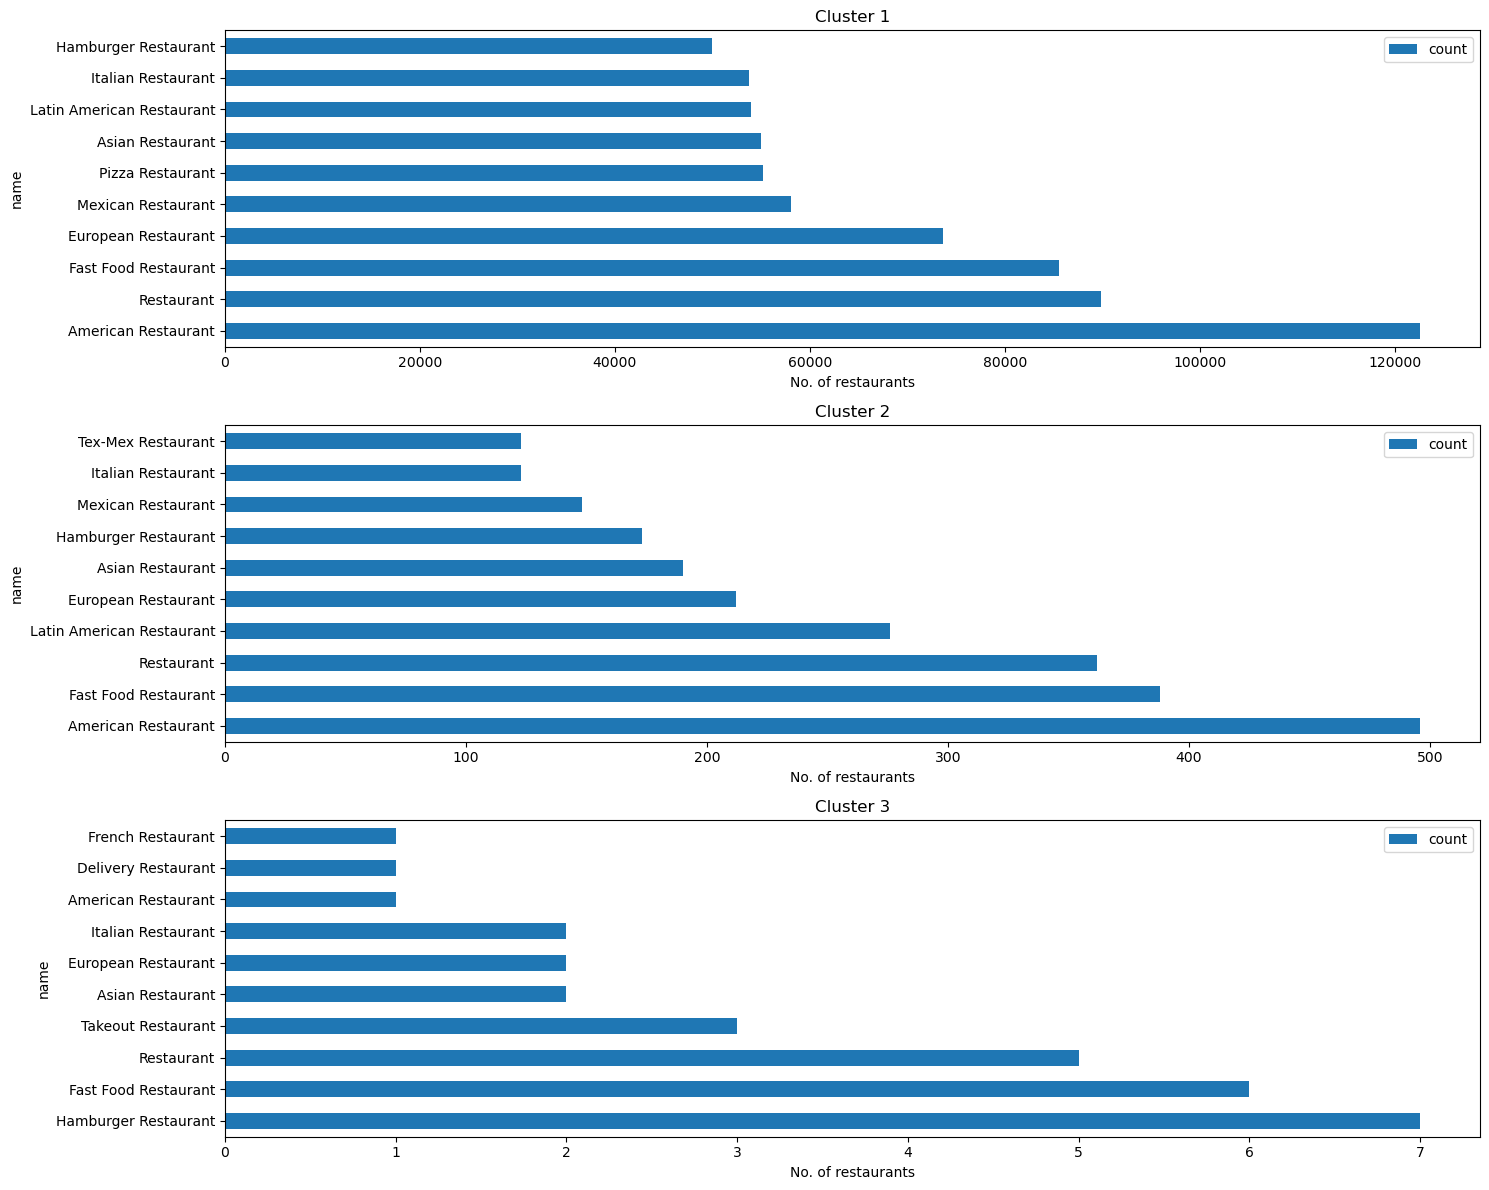

In [126]:
df_list = [places_1 ,places_2, places_3]
fig, axes = plt.subplots(3, 1)

count = 0
for r in range(3):
    for c in range(1):
        df_list[count].plot.barh(x = 'name', y = 'count', ax = axes[r], width=0.5, figsize=(15,12))
        axes[r].set_title('Cluster {}'.format(count+1))
        plt.sca(axes[r])
        plt.xlabel('No. of restaurants')
        count += 1

fig.tight_layout()

In [128]:
# create map
clusters_map = folium.Map()

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster in zip(train_set.head(100)['latitude'], train_set.head(100)['longitude'], train_set.head(100)['clusterLabels']):
    label = folium.Popup(' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(clusters_map)
       
clusters_map